In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.api import VAR
import pandas as pd
from time import time

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.api import OLS

In [3]:
from math import sqrt

In [4]:
from sklearn.metrics import mean_squared_error

# Load Data

In [82]:
df = pd.read_csv("TM.csv")

In [83]:
df.head()

,Date,TM,TM1,TM2,U,ER,I,CPI,IP,TM_RAW,TM_RAW1,TM_RAW2,BSE_RAW,BSE_RAW1,BSE_RAW2,BSE_P,BSE_P1,BSE_P2
0,Mar-16,0.2900,-0.1104,-0.1390,8.73,66.8586,0.10,126.0,4.0,386.60,299.70,336.90,25341.86,23002.00,24870.69,0.1017,-0.0751,-0.0477
1,Apr-16,0.0563,0.2900,-0.1104,8.90,66.4734,1.03,127.3,7.2,408.35,386.60,299.70,25606.62,25341.86,23002.00,0.0104,0.1017,-0.0751
2,May-16,0.1256,0.0563,0.2900,9.65,66.9571,1.02,128.6,5.2,459.65,408.35,386.60,26667.96,25606.62,25341.86,0.0414,0.0104,0.1017
3,Jun-16,-0.0009,0.1256,0.0563,8.91,67.2331,1.17,130.1,6.0,459.25,459.65,408.35,26999.72,26667.96,25606.62,0.0124,0.0414,0.0104
4,Jul-16,0.0957,-0.0009,0.1256,8.51,67.1255,0.77,131.1,7.3,503.20,459.25,459.65,28051.86,26999.72,26667.96,0.0390,0.0124,0.0414


In [84]:
df.describe()

,TM,TM1,TM2,U,ER,I,CPI,IP,TM_RAW,TM_RAW1,TM_RAW2,BSE_RAW,BSE_RAW1,BSE_RAW2,BSE_P,BSE_P1,BSE_P2
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.011929,0.010598,0.010529,7.359091,69.629403,0.395152,142.571212,3.677879,291.690909,291.878788,292.529545,36372.031061,35848.540303,35428.598636,0.015430,0.012862,0.012109
std,0.162259,0.162905,0.162969,3.191509,3.680269,0.645155,10.367995,19.679669,139.424208,139.426555,139.536559,7321.981418,7012.960626,6822.483692,0.053078,0.053299,0.053803
min,-0.449000,-0.449000,-0.449000,3.370000,63.618900,-1.010000,126.000000,-57.310000,71.050000,71.050000,71.050000,25341.860000,23002.000000,23002.000000,-0.230500,-0.230500,-0.230500
25%,-0.072850,-0.074700,-0.074700,5.885000,66.765375,0.070000,134.450000,0.985000,173.087500,173.087500,173.087500,31180.280000,30977.657500,30169.202500,-0.010025,-0.012350,-0.013800
50%,-0.005100,-0.005100,-0.005100,6.925000,69.569250,0.370000,140.300000,3.900000,284.900000,288.175000,288.175000,35916.230000,35645.460000,35372.930000,0.010900,0.010450,0.010450
75%,0.066825,0.066825,0.066825,8.167500,73.033075,0.762500,151.375000,5.192500,423.387500,423.387500,423.387500,39303.867500,38941.890000,38671.515000,0.041300,0.040900,0.040900
max,0.513000,0.513000,0.513000,23.520000,76.205000,2.640000,162.900000,134.630000,537.700000,537.700000,537.700000,57552.390000,52586.840000,52482.710000,0.144200,0.144200,0.144200


In [85]:
df.corr()

,TM,TM1,TM2,U,ER,I,CPI,IP,TM_RAW,TM_RAW1,TM_RAW2,BSE_RAW,BSE_RAW1,BSE_RAW2,BSE_P,BSE_P1,BSE_P2
TM,1.000000,-0.006087,0.077313,0.204640,0.126814,0.217813,0.133409,-0.065440,0.056064,-0.164672,-0.167134,0.118388,-0.036354,-0.050937,0.600816,0.017261,0.090054
TM1,-0.006087,1.000000,0.001640,-0.047860,0.069209,-0.059682,0.151156,-0.030382,0.059624,0.055086,-0.167530,0.170559,0.154369,-0.011142,0.034119,0.620013,0.029261
TM2,0.077313,0.001640,1.000000,-0.257679,0.089289,-0.018406,0.199171,-0.134356,0.078557,0.058358,0.050669,0.221991,0.246237,0.214896,-0.063972,0.078212,0.627085
U,0.204640,-0.047860,-0.257679,1.000000,0.548966,0.284750,0.324883,-0.031350,-0.366547,-0.413650,-0.414843,0.066129,0.037389,0.109780,0.136985,-0.203447,-0.398309
ER,0.126814,0.069209,0.089289,0.548966,1.000000,0.078980,0.839873,-0.068952,-0.747352,-0.766945,-0.777083,0.613127,0.620484,0.648304,0.033362,-0.056081,-0.030658
I,0.217813,-0.059682,-0.018406,0.284750,0.078980,1.000000,0.121437,0.018041,-0.076696,-0.104719,-0.116798,0.064952,-0.037986,0.031123,0.404210,-0.202159,-0.074326
CPI,0.133409,0.151156,0.199171,0.324883,0.839873,0.121437,1.000000,0.071890,-0.658025,-0.670501,-0.690929,0.877655,0.868453,0.861983,0.094062,0.068528,0.094362
IP,-0.065440,-0.030382,-0.134356,-0.031350,-0.068952,0.018041,0.071890,1.000000,0.249944,0.249786,0.238847,0.274284,0.292051,0.277713,-0.048250,0.030687,-0.108394
TM_RAW,0.056064,0.059624,0.078557,-0.366547,-0.747352,-0.076696,-0.658025,0.249944,1.000000,0.968135,0.936974,-0.451497,-0.491505,-0.526680,0.086399,0.079235,0.096112
TM_RAW1,-0.164672,0.055086,0.058358,-0.413650,-0.766945,-0.104719,-0.670501,0.249786,0.968135,1.000000,0.967641,-0.463843,-0.471503,-0.505368,-0.041641,0.085323,0.077417


In [86]:
df["Date"] = pd.to_datetime(df["Date"],format="%b-%y")
df.set_index("Date")

,TM,TM1,TM2,U,ER,I,CPI,IP,TM_RAW,TM_RAW1,TM_RAW2,BSE_RAW,BSE_RAW1,BSE_RAW2,BSE_P,BSE_P1,BSE_P2
Date,,,,,,,,,,,,,,,,,
2016-03-01,0.2900,-0.1104,-0.1390,8.73,66.8586,0.10,126.0,4.00,386.60,299.70,336.90,25341.86,23002.00,24870.69,0.1017,-0.0751,-0.0477
2016-04-01,0.0563,0.2900,-0.1104,8.90,66.4734,1.03,127.3,7.20,408.35,386.60,299.70,25606.62,25341.86,23002.00,0.0104,0.1017,-0.0751
2016-05-01,0.1256,0.0563,0.2900,9.65,66.9571,1.02,128.6,5.20,459.65,408.35,386.60,26667.96,25606.62,25341.86,0.0414,0.0104,0.1017
2016-06-01,-0.0009,0.1256,0.0563,8.91,67.2331,1.17,130.1,6.00,459.25,459.65,408.35,26999.72,26667.96,25606.62,0.0124,0.0414,0.0104
2016-07-01,0.0957,-0.0009,0.1256,8.51,67.1255,0.77,131.1,7.30,503.20,459.25,459.65,28051.86,26999.72,26667.96,0.0390,0.0124,0.0414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,-0.0263,-0.0655,0.2293,7.97,74.5027,0.64,157.8,-3.20,293.85,301.80,322.95,48782.36,49509.15,49099.99,-0.0147,0.0083,0.0608
2021-05-01,0.0847,-0.0263,-0.0655,11.90,73.1808,1.65,160.4,24.23,318.75,293.85,301.80,51937.44,48782.36,49509.15,0.0647,-0.0147,0.0083
2021-06-01,0.0654,0.0847,-0.0263,9.17,73.6279,0.56,161.3,134.63,339.60,318.75,293.85,52482.71,51937.44,48782.36,0.0105,0.0647,-0.0147


### Time Series Plots

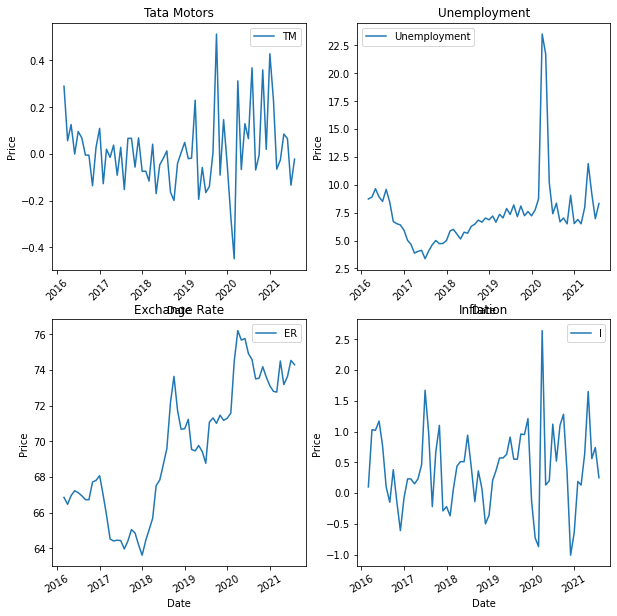

In [87]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(df['Date'],df['TM'], label='TM')
plt.title('Tata Motors')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)

plt.subplot(222)
plt.plot(df['Date'],df['U'], label='Unemployment')
plt.title('Unemployment')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)

plt.subplot(223)
plt.plot(df['Date'],df['ER'], label='ER')
plt.title('Exchange Rate')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=30)

plt.subplot(224)
plt.plot(df['Date'],df['I'], label='I')
plt.title('Inflation')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=30)

plt.show()

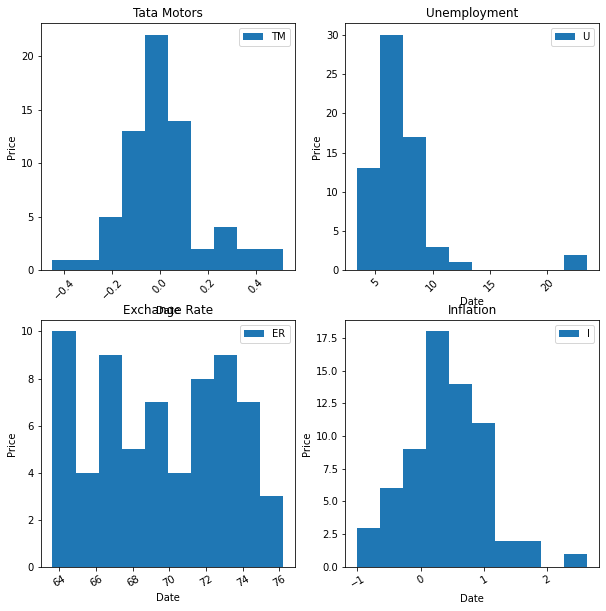

In [88]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.hist(df['TM'], label='TM')
plt.title('Tata Motors')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)

plt.subplot(222)
plt.hist(df['U'], label='U')
plt.title('Unemployment')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)

plt.subplot(223)
plt.hist(df['ER'], label='ER')
plt.title('Exchange Rate')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=30)

plt.subplot(224)
plt.hist(df['I'], label='I')
plt.title('Inflation')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=30)

plt.show()

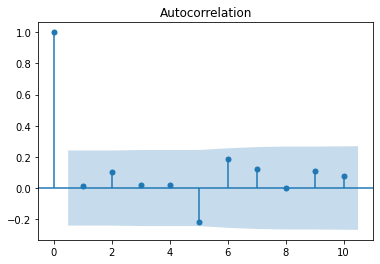

In [89]:
acf_plot = plot_acf(df.TM, lags=10)

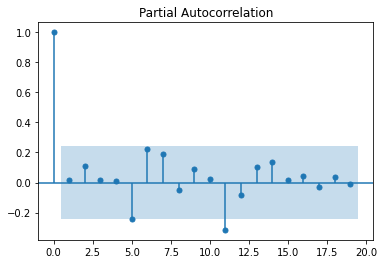

In [90]:
pacf_plot = plot_pacf(df.TM)

In [91]:
result_airtel = adfuller(df['TM'])
#result_airtel_diff = adfuller(df['Airtel'][:-1])

In [92]:
print('ADF Statistic:', result_airtel[0])
print('p-value:', result_airtel[1])
for k,v in result_airtel[4].items():
    print('key:', k, ' Value: ',v)
#print('ADF Statistic:', result_airtel[0])
if result_airtel[0] < result_airtel[4]['5%']:
    print('Reject Null Hypothesis because - Time Series is Stationary')
else:
    print('DO NOT Reject Null Hypothesis because - Time Series is NON-Stationary')

ADF Statistic: -8.011173167541557
p-value: 2.1993550302196833e-12
key: 1%  Value:  -3.5352168748293127
key: 5%  Value:  -2.9071540828402367
key: 10%  Value:  -2.5911025443786984
Reject Null Hypothesis because - Time Series is Stationary


In [93]:
def perform_stationary_test(series_data):
    result = adfuller(series_data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for k,v in result[4].items():
        print('key:', k, ' Value: ',v)

    if result[0] < result[4]['5%']:
        print('Reject Null Hypothesis because - Time Series is Stationary')
    else:
        print('DO NOT Reject Null Hypothesis because - Time Series is NON-Stationary')

In [94]:
perform_stationary_test(df.TM)

ADF Statistic: -8.011173167541557
p-value: 2.1993550302196833e-12
key: 1%  Value:  -3.5352168748293127
key: 5%  Value:  -2.9071540828402367
key: 10%  Value:  -2.5911025443786984
Reject Null Hypothesis because - Time Series is Stationary


In [95]:
perform_stationary_test(df.U)

ADF Statistic: -2.807852968728989
p-value: 0.057160753559629025
key: 1%  Value:  -3.5386953618719676
key: 5%  Value:  -2.9086446751210775
key: 10%  Value:  -2.591896782564878
DO NOT Reject Null Hypothesis because - Time Series is NON-Stationary


In [96]:
perform_stationary_test(df.I)

ADF Statistic: -6.139040906704207
p-value: 8.054519741895259e-08
key: 1%  Value:  -3.5352168748293127
key: 5%  Value:  -2.9071540828402367
key: 10%  Value:  -2.5911025443786984
Reject Null Hypothesis because - Time Series is Stationary


In [97]:
perform_stationary_test(df.CPI)

ADF Statistic: 0.37910893331409945
p-value: 0.9806966553012402
key: 1%  Value:  -3.53692771987915
key: 5%  Value:  -2.907887369384766
key: 10%  Value:  -2.591493291015625
DO NOT Reject Null Hypothesis because - Time Series is NON-Stationary


In [98]:
perform_stationary_test(df.ER)

ADF Statistic: -1.1229826396144398
p-value: 0.7058202227878063
key: 1%  Value:  -3.53692771987915
key: 5%  Value:  -2.907887369384766
key: 10%  Value:  -2.591493291015625
DO NOT Reject Null Hypothesis because - Time Series is NON-Stationary


# Model 1 - Linear Regression - Time Series

In [99]:
X = df[['TM1','TM2']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['TM']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     TM   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.1906
Date:                Sat, 08 Jan 2022   Prob (F-statistic):              0.827
Time:                        17:30:33   Log-Likelihood:                 27.078
No. Observations:                  66   AIC:                            -48.16
Df Residuals:                      63   BIC:                            -41.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0112      0.020      0.551      0.5

# Model 1 - Linear Regression - Factor Model

In [100]:
X = df[['TM_RAW1','TM_RAW2']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['TM_RAW']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 TM_RAW   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     470.8
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.31e-38
Time:                        17:30:35   Log-Likelihood:                -327.64
No. Observations:                  66   AIC:                             661.3
Df Residuals:                      63   BIC:                             667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0918     10.266      0.886      0.3

In [101]:
X = df[['ER', 'CPI', 'IP']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['TM_RAW']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 TM_RAW   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     32.25
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.10e-12
Time:                        17:30:36   Log-Likelihood:                -387.99
No. Observations:                  66   AIC:                             784.0
Df Residuals:                      62   BIC:                             792.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2155.7721    215.927      9.984      0.0

In [102]:
print(len(df))

66


In [103]:
train_end=60

# ARMA Model

In [104]:
train_end=60
train_data = df.TM_RAW[:train_end]
test_data = df.TM_RAW[train_end :]

In [105]:
model = ARMA(train_data, order=(1,0))

c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [106]:
model_fit = model.fit()

In [107]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 TM_RAW   No. Observations:                   60
Model:                     ARMA(1, 0)   Log Likelihood                -297.732
Method:                       css-mle   S.D. of innovations             33.828
Date:                Sat, 08 Jan 2022   AIC                            601.465
Time:                        17:30:42   BIC                            607.748
Sample:                             0   HQIC                           603.922
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          320.4559     88.063      3.639      0.000     147.856     493.056
ar.L1.TM_RAW     0.9635      0.026     37.157      0.000       0.913       1.014
                                    Roots   

c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=335.931806, expected=301.800000
predicted=306.964787, expected=293.850000
predicted=290.601961, expected=318.750000
predicted=317.198939, expected=339.600000
predicted=341.287886, expected=293.950000
predicted=294.269012, expected=287.300000
Test RMSE: 28.637


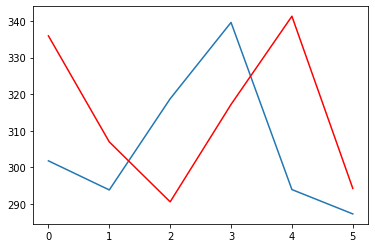

In [108]:
train, test = train_data, test_data
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test.iloc[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.show()

# Linear Regression Model Prediction

                            OLS Regression Results                            
Dep. Variable:                 TM_RAW   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     470.8
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.31e-38
Time:                        17:30:53   Log-Likelihood:                -327.64
No. Observations:                  66   AIC:                             661.3
Df Residuals:                      63   BIC:                             667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0918     10.266      0.886      0.3

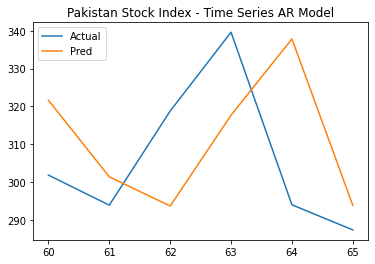

In [109]:
X = df[['TM_RAW1','TM_RAW2']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['TM_RAW']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual')
plt.plot(predictions, label='Pred')
plt.title("Pakistan Stock Index - Time Series AR Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()



# Factor Model Prediction

In [110]:
X = df[['U','ER', 'CPI']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['TM_RAW']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 TM_RAW   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     26.63
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           3.45e-11
Time:                        17:30:56   Log-Likelihood:                -391.70
No. Observations:                  66   AIC:                             791.4
Df Residuals:                      62   BIC:                             800.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2291.4543    262.731      8.722      0.0

Test RMSE: 144.295


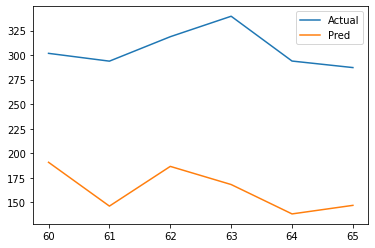

In [111]:
predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual')
plt.plot(predictions, label='Pred')
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()

# BSE Index

In [169]:
df = pd.read_csv("IND_TS.csv")

In [170]:
df.head()

,Year,Month,IP,CPI,I,ER,U,U1,U2,ER1,ER2,I1,I2,CPI1,CPI2,IP1,IP2,BSE_RAW,BSE_RAW1,BSE_RAW2
0,2016,3,5.2,126.0,0.00,66.8586,8.73,8.46,8.72,68.2764,67.3127,-0.24,0.16,126.0,126.3,7.2,4.0,25341.86,23002.00,24870.69
1,2016,4,6.0,127.3,1.03,66.4734,8.90,8.73,8.46,66.8586,68.2764,0.00,-0.24,126.0,126.0,5.2,7.2,25606.62,25341.86,23002.00
2,2016,5,7.3,128.6,1.02,66.9571,9.65,8.90,8.73,66.4734,66.8586,1.03,0.00,127.3,126.0,6.0,5.2,26667.96,25606.62,25341.86
3,2016,6,8.0,130.1,1.17,67.2331,8.91,9.65,8.90,66.9571,66.4734,1.02,1.03,128.6,127.3,7.3,6.0,26999.72,26667.96,25606.62
4,2016,7,4.5,131.1,0.77,67.1255,8.51,8.91,9.65,67.2331,66.9571,1.17,1.02,130.1,128.6,8.0,7.3,28051.86,26999.72,26667.96


                            OLS Regression Results                            
Dep. Variable:                BSE_RAW   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     404.8
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.11e-36
Time:                        23:35:50   Log-Likelihood:                -593.72
No. Observations:                  66   AIC:                             1193.
Df Residuals:                      63   BIC:                             1200.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.5362   1314.704      0.146      0.8

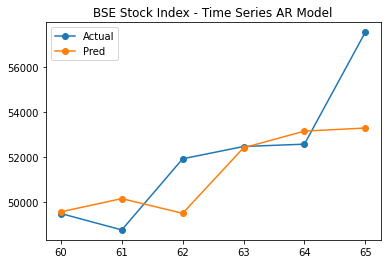

############# Test Set
Correct Directions: 3
Incorrect Directions: 2
Test RMSE: 1938.308


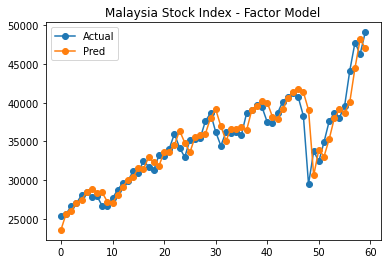

############# Training Set
Correct Directions: 33
Incorrect Directions: 26


In [171]:
X = df[['BSE_RAW1','BSE_RAW2']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['BSE_RAW']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual', marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("BSE Stock Index - Time Series AR Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
#############Test Set
direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1

print('############# Test Set')
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)


#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

                            OLS Regression Results                            
Dep. Variable:                BSE_RAW   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     107.8
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.48e-24
Time:                        23:35:56   Log-Likelihood:                -620.17
No. Observations:                  66   AIC:                             1248.
Df Residuals:                      62   BIC:                             1257.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.002e+04   8373.026     -4.780      0.0

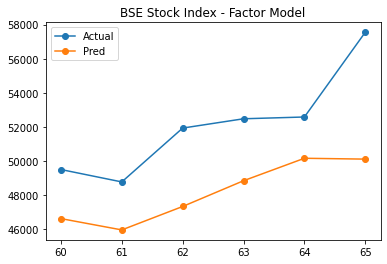

Correct Directions: 4
Incorrect Directions: 1
Test RMSE: 2736.154


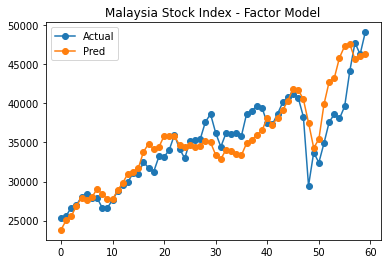

############# Training Set
Correct Directions: 42
Incorrect Directions: 17


In [172]:
X = df[['U','ER','CPI']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['BSE_RAW']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("BSE Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

## IND - ARDL Model

                            OLS Regression Results                            
Dep. Variable:                BSE_RAW   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     111.8
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           4.72e-33
Time:                        23:37:43   Log-Likelihood:                -575.89
No. Observations:                  66   AIC:                             1176.
Df Residuals:                      54   BIC:                             1202.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2422.8976   5247.197     -0.462      0.6

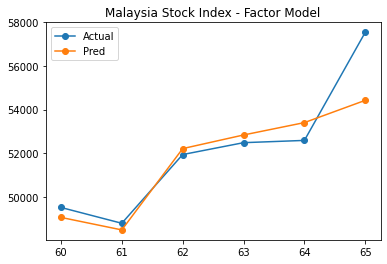

Correct Directions: 5
Incorrect Directions: 0
Test RMSE: 1503.492


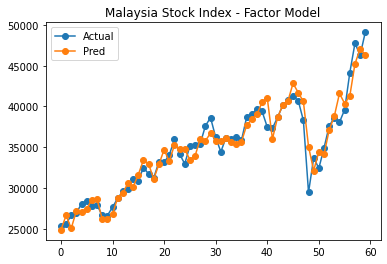

############# Training Set
Correct Directions: 39
Incorrect Directions: 20


In [173]:
X = df[['BSE_RAW1','BSE_RAW2','I','I1', 'I2', 'ER','ER1', 'ER2','CPI','CPI1', 'CPI2']] 

#X = df[['PAK1', 'PAK2','ER', 'ER1', 'ER2']] 
Y = df['BSE_RAW']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

# Pakistan

In [275]:
df = pd.read_csv("PAK_TS.csv")

In [276]:
df.head()

,Date,PAK,PAK_R,CPI,I,ER,PAK1,PAK2,PAK_R1,PAK_R2,CPI1,CPI2,I1,I2,ER1,ER2,U,U1,U2
0,Mar-16,52.64,0.0528,203.28,0.15,104.7058,50.00,49.12,0.0179,-0.0568,202.98,203.49,-0.25,0.21,104.6020,104.8938,3.6050,3.5875,3.5700
1,Apr-16,55.34,0.0513,206.43,1.55,104.7248,52.64,50.00,0.0528,0.0179,203.28,202.98,0.15,-0.25,104.7058,104.6020,3.6225,3.6050,3.5875
2,May-16,57.40,0.0372,205.99,-0.21,104.7325,55.34,52.64,0.0513,0.0528,206.43,203.28,1.55,0.15,104.7248,104.7058,3.6400,3.6225,3.6050
3,Jun-16,60.80,0.0592,207.30,0.64,104.5846,57.40,55.34,0.0372,0.0513,205.99,206.43,-0.21,1.55,104.7325,104.7248,3.6575,3.6400,3.6225
4,Jul-16,62.88,0.0342,210.08,1.34,104.7714,60.80,57.40,0.0592,0.0372,207.30,205.99,0.64,-0.21,104.5846,104.7325,3.6750,3.6575,3.6400


In [277]:
df.corr()

,PAK,PAK_R,CPI,I,ER,PAK1,PAK2,PAK_R1,PAK_R2,CPI1,CPI2,I1,I2,ER1,ER2,U,U1,U2
PAK,1.000000,0.110916,0.544038,-0.252033,-0.952468,0.984918,0.966616,0.105685,0.115572,0.503696,0.467216,-0.226422,-0.250108,-0.940059,-0.926024,-0.623218,-0.634131,-0.649032
PAK_R,0.110916,1.000000,-0.246860,0.106297,-0.007444,-0.049641,-0.058794,0.024520,0.043107,-0.182845,-0.146289,0.066315,-0.163098,0.022956,0.030573,-0.079315,-0.088550,-0.107608
CPI,0.544038,-0.246860,1.000000,-0.039263,-0.662232,0.585453,0.624628,-0.230113,-0.192001,0.930590,0.866016,-0.060479,-0.160005,-0.694479,-0.729836,-0.548166,-0.532623,-0.519234
I,-0.252033,0.106297,-0.039263,1.000000,0.270581,-0.273935,-0.263229,-0.059911,0.087211,-0.019235,0.044991,0.051506,0.039164,0.271763,0.259396,0.158602,0.168158,0.178480
ER,-0.952468,-0.007444,-0.662232,0.270581,1.000000,-0.956381,-0.953404,-0.031825,-0.027836,-0.629110,-0.596578,0.238485,0.239695,0.994513,0.985056,0.702051,0.709183,0.718816
PAK1,0.984918,-0.049641,0.585453,-0.273935,-0.956381,1.000000,0.984876,0.092260,0.099681,0.537396,0.495512,-0.234466,-0.231479,-0.949061,-0.936505,-0.614162,-0.623359,-0.635269
PAK2,0.966616,-0.058794,0.624628,-0.263229,-0.953404,0.984876,1.000000,-0.068521,0.087013,0.580268,0.530970,-0.259774,-0.238497,-0.953341,-0.945633,-0.610821,-0.619047,-0.629109
PAK_R1,0.105685,0.024520,-0.230113,-0.059911,-0.031825,0.092260,-0.068521,1.000000,0.019400,-0.270262,-0.207368,0.142608,0.064461,0.016931,0.045110,-0.020042,-0.023921,-0.033472
PAK_R2,0.115572,0.043107,-0.192001,0.087211,-0.027836,0.099681,0.087013,0.019400,1.000000,-0.235049,-0.275859,-0.047185,0.146560,-0.018067,0.030097,0.001743,-0.002931,-0.006375
CPI1,0.503696,-0.182845,0.930590,-0.019235,-0.629110,0.537396,0.580268,-0.270262,-0.235049,1.000000,0.929667,-0.017682,-0.062912,-0.653931,-0.686926,-0.564594,-0.546075,-0.529400


In [278]:
df.describe()

,PAK,PAK_R,CPI,I,ER,PAK1,PAK2,PAK_R1,PAK_R2,CPI1,CPI2,I1,I2,ER1,ER2,U,U1,U2
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,42.310299,-0.007476,191.291343,0.632985,133.543190,42.690896,43.012090,-0.005533,-0.006167,192.071045,192.905075,0.597612,0.592090,132.583851,131.697270,4.118918,4.091716,4.065672
std,16.130018,0.078586,43.033138,0.829858,24.800996,16.003756,15.911983,0.077557,0.077803,42.759661,42.422951,0.815906,0.817278,24.656213,24.566483,0.422746,0.396215,0.371145
min,19.440000,-0.277900,126.860000,-1.040000,104.483000,19.440000,19.440000,-0.277900,-0.277900,126.860000,126.860000,-1.040000,-1.040000,104.483000,104.483000,3.605000,3.587500,3.570000
25%,28.050000,-0.041550,142.460000,0.050000,105.295450,28.475000,28.990000,-0.040800,-0.041550,142.460000,142.460000,0.035000,0.035000,105.036850,104.859750,3.866667,3.853333,3.840000
50%,36.180000,-0.012200,210.940000,0.570000,139.577300,38.600000,40.040000,-0.011900,-0.011900,210.940000,210.940000,0.510000,0.480000,134.251500,130.148300,4.010769,4.010000,4.003077
75%,56.370000,0.034800,222.335000,1.340000,157.483750,56.370000,56.370000,0.034800,0.034800,222.335000,222.335000,1.300000,1.300000,156.668900,156.468250,4.132273,4.090909,4.076154
max,72.080000,0.224800,255.940000,2.500000,168.877700,72.080000,72.080000,0.224800,0.224800,255.940000,255.940000,2.500000,2.500000,168.065900,168.065900,5.410000,5.315000,5.220000


# PAK - ARIMA

                            OLS Regression Results                            
Dep. Variable:                    PAK   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1051.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.14e-49
Time:                        16:58:03   Log-Likelihood:                -162.90
No. Observations:                  67   AIC:                             331.8
Df Residuals:                      64   BIC:                             338.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0705      0.998      0.071      0.9

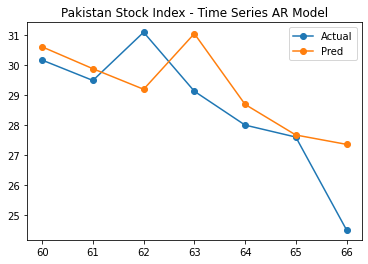

Correct Directions: 4
Incorrect Directions: 2
Test RMSE: 2.861


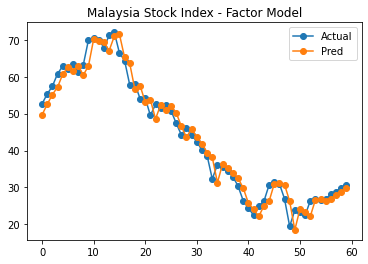

############# Training Set
Correct Directions: 34
Incorrect Directions: 25


In [279]:
X = df[['PAK1','PAK2']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['PAK']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Pakistan Stock Index - Time Series AR Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)


#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

In [78]:
# PAK - Factor Model

                            OLS Regression Results                            
Dep. Variable:                    PAK   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     371.0
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           6.26e-36
Time:                        16:59:36   Log-Likelihood:                -196.01
No. Observations:                  67   AIC:                             398.0
Df Residuals:                      64   BIC:                             404.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.9936      6.825     21.245      0.0

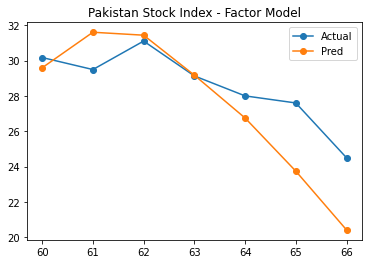

Correct Directions: 4
Incorrect Directions: 2
Test RMSE: 4.700


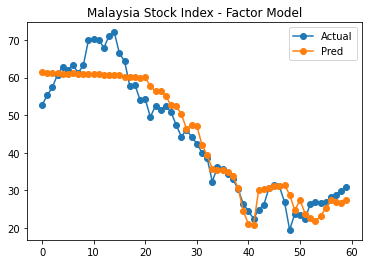

############# Training Set
Correct Directions: 37
Incorrect Directions: 22


In [282]:
X = df[['ER','CPI']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['PAK']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Pakistan Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

                            OLS Regression Results                            
Dep. Variable:                    PAK   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     250.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           5.77e-35
Time:                        17:00:31   Log-Likelihood:                -195.09
No. Observations:                  67   AIC:                             398.2
Df Residuals:                      63   BIC:                             407.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.3927      8.889     15.457      0.0

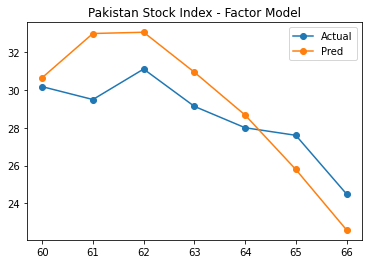

Correct Directions: 5
Incorrect Directions: 1
Test RMSE: 4.655


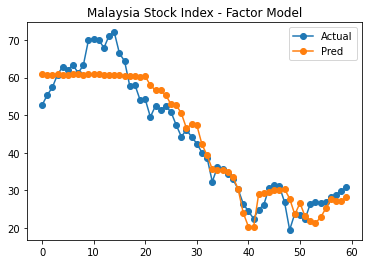

############# Training Set
Correct Directions: 38
Incorrect Directions: 21


In [285]:
X = df[['ER','CPI', 'U']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['PAK']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Pakistan Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

## PAK - ARDL Model

                            OLS Regression Results                            
Dep. Variable:                    PAK   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.10e-39
Time:                        17:01:06   Log-Likelihood:                -147.76
No. Observations:                  67   AIC:                             325.5
Df Residuals:                      52   BIC:                             358.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1980     11.479      3.589      0.0

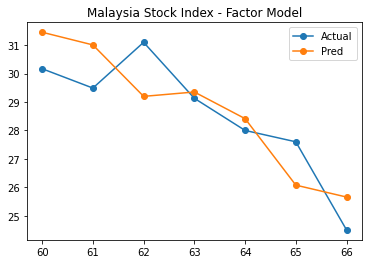

Correct Directions: 4
Incorrect Directions: 2
Test RMSE: 2.279


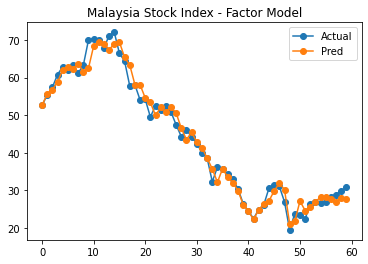

############# Training Set
Correct Directions: 35
Incorrect Directions: 24


In [286]:
X = df[['PAK1','PAK2','I','I1', 'I2', 'ER','ER1', 'ER2','CPI','CPI1', 'CPI2', 'U', 'U1', 'U2']] 

#X = df[['PAK1', 'PAK2','ER', 'ER1', 'ER2']] 
Y = df['PAK']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

# Malaysia

In [264]:
df = pd.read_csv("Malaysia_TS.csv")

                            OLS Regression Results                            
Dep. Variable:                    MAL   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     65.18
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           4.56e-16
Time:                        18:25:35   Log-Likelihood:                -325.37
No. Observations:                  66   AIC:                             656.7
Df Residuals:                      63   BIC:                             663.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        161.7849     65.650      2.464      0.0

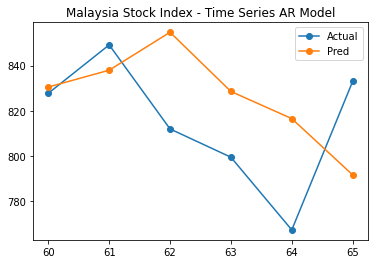

Correct Directions: 3
Incorrect Directions: 2
Test RMSE: 33.431


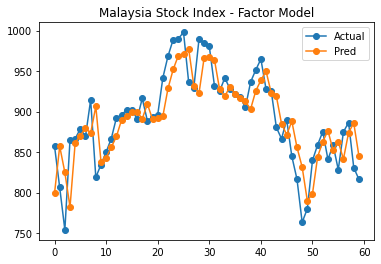

############# Training Set
Correct Directions: 32
Incorrect Directions: 27


In [265]:
X = df[['MAL1','MAL2']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['MAL']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Time Series AR Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

                            OLS Regression Results                            
Dep. Variable:                    MAL   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     12.12
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           2.61e-07
Time:                        18:25:37   Log-Likelihood:                -343.08
No. Observations:                  66   AIC:                             696.2
Df Residuals:                      61   BIC:                             707.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        792.0122    347.374      2.280      0.0

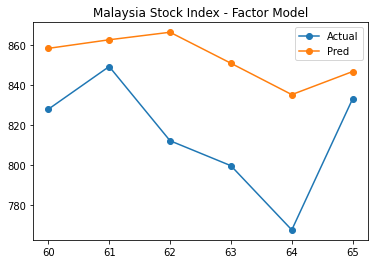

Correct Directions: 4
Incorrect Directions: 1
Test RMSE: 43.796


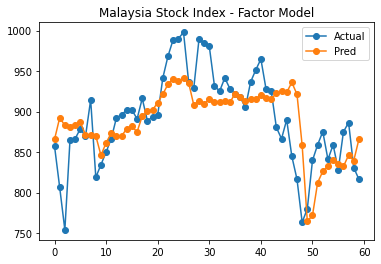

############# Training Set
Correct Directions: 40
Incorrect Directions: 19


In [266]:
X = df[['I','ER','CPI', 'U']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['MAL']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

                            OLS Regression Results                            
Dep. Variable:                    MAL   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     16.13
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           7.34e-08
Time:                        18:25:38   Log-Likelihood:                -343.34
No. Observations:                  66   AIC:                             694.7
Df Residuals:                      62   BIC:                             703.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        779.1115    345.415      2.256      0.0

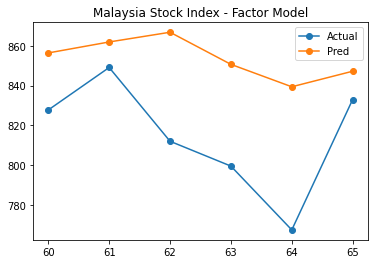

Correct Directions: 4
Incorrect Directions: 1
Test RMSE: 43.878


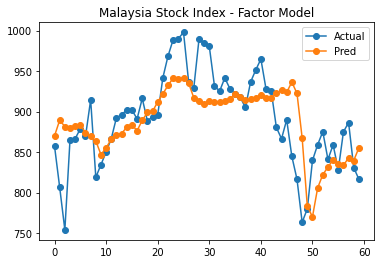

############# Training Set
Correct Directions: 38
Incorrect Directions: 21


In [267]:
X = df[['ER','CPI', 'U']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['MAL']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

Test RMSE: 43.878


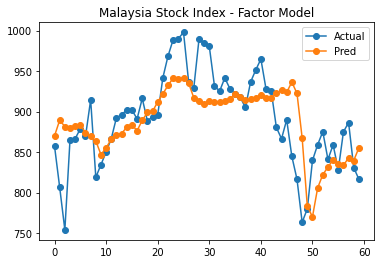

In [268]:
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()

In [269]:
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)


Correct Directions: 38
Incorrect Directions: 21


In [270]:
len(X[:60])

60

# MAL - ARDL

                            OLS Regression Results                            
Dep. Variable:                    MAL   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     25.25
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.21e-16
Time:                        18:25:38   Log-Likelihood:                -308.89
No. Observations:                  66   AIC:                             637.8
Df Residuals:                      56   BIC:                             659.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        550.7491    235.950      2.334      0.0

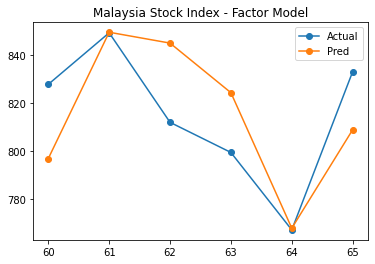

Correct Directions: 5
Incorrect Directions: 0
Test RMSE: 26.354


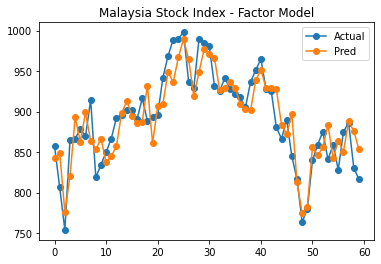

############# Training Set
Correct Directions: 39
Incorrect Directions: 20


In [271]:
X = df[['MAL1','I','I1',  'ER','ER1', 'ER2','CPI','CPI1', 'CPI2']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['MAL']

X = sm.add_constant(X) # adding a constant

model = OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

predictions = model.predict(X[60:])
plt.plot(Y[60:], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[60:], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60
for i in range(len(predictions)-1):
    #print(Y[i], predictions[i])
    if (Y[i+1+offset]-Y[i+offset] >0 and predictions[i+1+offset] - predictions[i+offset] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1+offset]-Y[i+offset] <0 and predictions[i+1+offset] - predictions[i+offset] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

#############Training Set
predictions = model.predict(X[:60])
plt.plot(Y[:60], label='Actual',marker='o')
plt.plot(predictions, label='Pred',marker='o')
plt.title("Malaysia Stock Index - Factor Model")
rmse = sqrt(mean_squared_error(Y[:60], predictions))
print('Test RMSE: %.3f' % rmse)
plt.legend()
plt.show()
print('############# Training Set')
direction_correct = 0
direction_incorrect = 0
for i in range(len(X[:59])):
    #print(Y[i], predictions[i])
    if (Y[i+1]-Y[i] >0 and predictions[i+1] - predictions[i] > 0):
        direction_correct = direction_correct + 1
    elif(Y[i+1]-Y[i] <0 and predictions[i+1] - predictions[i] < 0):
        direction_correct = direction_correct + 1
    else:
        direction_incorrect = direction_incorrect + 1
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)

## MAL - One Step Pred

In [272]:
## Factor Model

In [274]:
X = df[['ER','CPI', 'U']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['MAL']

#X = sm.add_constant(X) # adding a constant

#model = OLS(Y, X).fit()
#predictions = model.predict(X) 

#print_model = model.summary()
#print(print_model)

#predictions = model.predict(X[60:])
#plt.plot(Y[60:], label='Actual',marker='o')
#plt.plot(predictions, label='Pred',marker='o')
#plt.title("Malaysia Stock Index - Factor Model")
#rmse = sqrt(mean_squared_error(Y[60:], predictions))
#print('Test RMSE: %.3f' % rmse)
#plt.legend()
#plt.show()

direction_correct = 0
direction_incorrect = 0
offset=60

for i in range(6):
    X = df[['I','ER','CPI', 'U']][:i+offset]
    Y = df['MAL'][:i+offset]
    
    #X = sm.add_constant(X) # adding a constant
    model = OLS(Y, X).fit()
    
    print_model = model.summary()
    #print(print_model)
    y_curr_actual = Y[-1:].values[0]
    X_next_step = df[['I','ER','CPI', 'U']][i+offset:i+offset+1]
    #print(X_next_step)
    #X_next_step = sm.add_constant(X_next_step, has_constant='add')
    X_next_step = sm.add_constant(X_next_step)
    #print(X_next_step)
    y_actual_next_step = df['MAL'][i+offset:i+offset+1]
    #print('X_next_step--->', X_next_step)
    #print('y_actual_next_step--->', y_actual_next_step)
    predictions = model.predict(X_next_step) 
    y_pred_next_step = predictions.values[0]
    print(len(predictions), predictions.values[0], y_actual_next_step.values[0], y_curr_actual)
    
    if (y_pred_next_step - y_curr_actual) > 0 and  (y_actual_next_step.values[0] - y_curr_actual) > 0:
        direction_correct = direction_correct + 1
        print('increase')
    elif (y_pred_next_step - y_curr_actual) < 0 and  (y_actual_next_step.values[0] - y_curr_actual) < 0:
        direction_correct = direction_correct + 1
        print('decrease')
    else:
        direction_incorrect = direction_incorrect + 1
        print('wrong')
        
    
print('Correct Directions:', direction_correct)
print('Incorrect Directions:', direction_incorrect)



1 892.7789922513317 827.75 816.38
increase
1 892.4383106427131 849.13 827.75
increase
1 893.1713741425522 812.0 849.13
wrong
1 875.4384692733038 799.5 812.0
wrong
1 856.5830386932145 767.38 799.5
wrong
1 862.2218877000104 833.0 767.38
increase
Correct Directions: 3
Incorrect Directions: 3


59    816.38
60    827.75
61    849.13
62    812.00
63    799.50
64    767.38
65    833.00
Name: MAL, dtype: float64

array([767.38])

,Date,MAL,MAL_R,MAL1,MAL2,MAL_R1,MAL_R2,CPI,I,ER,U,CPI1,CPI2,I1,I2,ER1,ER2,U1,U2
0,42430,857.25,0.1004,779.00,785.00,-0.0076,0.0880,113.8,-0.61,4.0559,3.5,114.5,114.5,0.00,-0.26,4.1766,4.3322,3.4,3.4
1,42461,806.38,-0.0593,857.25,779.00,0.1004,-0.0076,114.3,0.44,3.8991,3.5,113.8,114.5,-0.61,0.00,4.0559,4.1766,3.5,3.4
2,42491,754.00,-0.0650,806.38,857.25,-0.0593,0.1004,114.6,0.26,4.0446,3.4,114.3,113.8,0.44,-0.61,3.8991,4.0559,3.5,3.5
3,42522,865.38,0.1477,754.00,806.38,-0.0650,-0.0593,114.8,0.17,4.0724,3.4,114.6,114.3,0.26,0.44,4.0446,3.8991,3.4,3.5
4,42552,866.63,0.0014,865.38,754.00,0.1477,-0.0650,115.1,0.26,4.0174,3.5,114.8,114.6,0.17,0.26,4.0724,4.0446,3.4,3.4


(1, 4)

(60, 5)

,const,I,ER,CPI,U
0,1.0,-0.61,4.0559,113.8,3.5
1,1.0,0.44,3.8991,114.3,3.5
2,1.0,0.26,4.0446,114.6,3.4
3,1.0,0.17,4.0724,114.8,3.4
4,1.0,0.26,4.0174,115.1,3.5


64

66